In [1]:
import graphlab
from graphlab import SFrame
import pandas as pd

%matplotlib inline

This non-commercial license of GraphLab Create for academic use is assigned to huip@indiana.edu and will expire on March 26, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1487692781.log


In [2]:
sf = SFrame.read_csv('../raw_data/nv_train_user_rest_rating_time.tsv', delimiter='\t', header=False)
sf.rename({
        'X1': 'uid',
        'X2': 'bid',
        'X3': 'rating',
        'X4': 'tstamp'
    })

Finished parsing file /home/phui/Research/yelp/raw_data/nv_train_user_rest_rating_time.tsv

Parsing completed. Parsed 100 lines in 0.303 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/phui/Research/yelp/raw_data/nv_train_user_rest_rating_time.tsv

Parsing completed. Parsed 202305 lines in 0.233357 secs.

uid,bid,rating,tstamp
mTDwQ4I2hAHz2i5AC1ab3w,xyTJYlbE_MLouK6rCou6zg,4,2008-02-04 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,UpkfQApZT5rctZicZ_ZTgw,5,2011-06-04 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,9FWEGULkG2g4LDja71MrvA,4,2011-06-06 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,N8NiWbLzee9EOeMnz2MOlw,2,2011-06-08 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,_ZyJLAlkmqefU0WXQ2o6jQ,5,2011-06-11 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,07bUAD_qnrJAXvJou_ls4g,1,2011-09-16 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,uBXSxanoPdT_Jc_x0_7ggg,2,2012-01-27 00:00:00
sxULQivO3NiCIDmWfZDSnA,bsIG-bXSRcCx62k4lHBEcw,1,2013-04-29 00:00:00
J3baStGXE2xRXYcgABj00A,Lq6CDJ2yHmMs4N7jscQhHQ,2,2014-01-21 00:00:00
J3baStGXE2xRXYcgABj00A,NsnZ5GhagXBKrCOelxVQxw,5,2014-01-22 00:00:00


In [3]:
sf.head()

uid,bid,rating,tstamp
mTDwQ4I2hAHz2i5AC1ab3w,xyTJYlbE_MLouK6rCou6zg,4,2008-02-04 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,UpkfQApZT5rctZicZ_ZTgw,5,2011-06-04 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,9FWEGULkG2g4LDja71MrvA,4,2011-06-06 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,N8NiWbLzee9EOeMnz2MOlw,2,2011-06-08 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,_ZyJLAlkmqefU0WXQ2o6jQ,5,2011-06-11 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,07bUAD_qnrJAXvJou_ls4g,1,2011-09-16 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,uBXSxanoPdT_Jc_x0_7ggg,2,2012-01-27 00:00:00
sxULQivO3NiCIDmWfZDSnA,bsIG-bXSRcCx62k4lHBEcw,1,2013-04-29 00:00:00
J3baStGXE2xRXYcgABj00A,Lq6CDJ2yHmMs4N7jscQhHQ,2,2014-01-21 00:00:00
J3baStGXE2xRXYcgABj00A,NsnZ5GhagXBKrCOelxVQxw,5,2014-01-22 00:00:00


In [4]:
rec = graphlab.recommender.item_similarity_recommender.create(sf, user_id='uid', item_id='bid', target='rating',
                                                             similarity_type='pearson')

Recsys training: model = item_similarity

Warning: Ignoring columns tstamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 202305 observations with 48635 users and 4591 items.

Data prepared in: 0.187428s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.784ms                        | 39         |

| 17.024ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 29.92ms                             | 0                | 0               |

| 196.033ms                           | 100              | 4591            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.23058s

In [5]:
test_sf = SFrame.read_csv('../raw_data/nv_test_user_rest_rating_time.tsv', delimiter='\t', header=False)
test_sf.rename({
        'X1': 'uid',
        'X2': 'bid',
        'X3': 'rating',
        'X4': 'tstamp'
    })

Finished parsing file /home/phui/Research/yelp/raw_data/nv_test_user_rest_rating_time.tsv

Parsing completed. Parsed 100 lines in 0.130648 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/phui/Research/yelp/raw_data/nv_test_user_rest_rating_time.tsv

Parsing completed. Parsed 84011 lines in 0.106803 secs.

uid,bid,rating,tstamp
mTDwQ4I2hAHz2i5AC1ab3w,wxf6JIS3U1U7d_GMwppq8Q,2,2008-02-04 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,lqx--hrRwe0oK6WnFYNXlg,5,2012-01-27 00:00:00
UwnXA4ox3K9RMGaRwqgaBw,_ZyJLAlkmqefU0WXQ2o6jQ,2,2012-07-22 00:00:00
sxULQivO3NiCIDmWfZDSnA,QY8CBhPwv6dE4onjhj6MDg,5,2014-05-01 00:00:00
J3baStGXE2xRXYcgABj00A,BVRWDjbj9g712L5INfhKog,4,2014-01-22 00:00:00
_QbGo-V3NT6MUfIWpQgZNQ,sIyHTizqAiGu12XMLX3N3g,4,2013-05-08 00:00:00
MgM1QYyaLYmfjdesfYDLrg,E9ZsPtGovfEPHlMHkDdlQA,2,2012-05-08 00:00:00
MgM1QYyaLYmfjdesfYDLrg,vSf0pqvaLp5sVSjJPeOqqQ,2,2013-09-14 00:00:00
MgM1QYyaLYmfjdesfYDLrg,QJlab4DqvBRJPUfg7Vn5ZQ,3,2013-11-02 00:00:00
JQrqNRWKO8M5wbhLvWafHg,f2Iga3A59AFYwoeAvc3e6A,4,2010-02-26 00:00:00


In [6]:
result = rec.evaluate(test_sf)

recommendations finished on 1000/48635 queries. users per second: 57195.1

recommendations finished on 2000/48635 queries. users per second: 65567.3

recommendations finished on 3000/48635 queries. users per second: 66420.2

recommendations finished on 4000/48635 queries. users per second: 67131

recommendations finished on 5000/48635 queries. users per second: 67284.8

recommendations finished on 6000/48635 queries. users per second: 63610.5

recommendations finished on 7000/48635 queries. users per second: 63727.3

recommendations finished on 8000/48635 queries. users per second: 64028.2

recommendations finished on 9000/48635 queries. users per second: 63832.5

recommendations finished on 10000/48635 queries. users per second: 63233.5

recommendations finished on 11000/48635 queries. users per second: 62870.1

recommendations finished on 12000/48635 queries. users per second: 62922.4

recommendations finished on 13000/48635 queries. users per second: 63213

recommendations finished on 14000/48635 queries. users per second: 63283.4

recommendations finished on 15000/48635 queries. users per second: 63379.4

recommendations finished on 16000/48635 queries. users per second: 63265.1

recommendations finished on 17000/48635 queries. users per second: 62775.1

recommendations finished on 18000/48635 queries. users per second: 63025.9

recommendations finished on 19000/48635 queries. users per second: 62400

recommendations finished on 20000/48635 queries. users per second: 62576.1

recommendations finished on 21000/48635 queries. users per second: 62176.5

recommendations finished on 22000/48635 queries. users per second: 61643.8

recommendations finished on 23000/48635 queries. users per second: 61369.2

recommendations finished on 24000/48635 queries. users per second: 61201.4

recommendations finished on 25000/48635 queries. users per second: 61338.9

recommendations finished on 26000/48635 queries. users per second: 61260.1

recommendations finished on 27000/48635 queries. users per second: 61322

recommendations finished on 28000/48635 queries. users per second: 61412.5

recommendations finished on 29000/48635 queries. users per second: 61486

recommendations finished on 30000/48635 queries. users per second: 61688.3

recommendations finished on 31000/48635 queries. users per second: 61809.6

recommendations finished on 32000/48635 queries. users per second: 61727.3

recommendations finished on 33000/48635 queries. users per second: 61631

recommendations finished on 34000/48635 queries. users per second: 61502.3

recommendations finished on 35000/48635 queries. users per second: 61496.2

recommendations finished on 36000/48635 queries. users per second: 61537.9

recommendations finished on 37000/48635 queries. users per second: 61562.1

recommendations finished on 38000/48635 queries. users per second: 61541.5

recommendations finished on 39000/48635 queries. users per second: 61537.8

recommendations finished on 40000/48635 queries. users per second: 61470.7

recommendations finished on 41000/48635 queries. users per second: 61462.4

recommendations finished on 42000/48635 queries. users per second: 61283.5

recommendations finished on 43000/48635 queries. users per second: 60715.4

recommendations finished on 44000/48635 queries. users per second: 60530.1

recommendations finished on 45000/48635 queries. users per second: 60307.9

recommendations finished on 46000/48635 queries. users per second: 59843.3

recommendations finished on 47000/48635 queries. users per second: 59478.7

recommendations finished on 48000/48635 queries. users per second: 57856.3


Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    | 0.000102806620746 | 5.40042300092e-05 |
|   2    | 6.16839724478e-05 | 6.42848920838e-05 |
|   3    | 5.48301977314e-05 | 8.48462162331e-05 |
|   4    | 6.16839724478e-05 | 0.000137831166925 |
|   5    | 4.93471779583e-05 | 0.000137831166925 |
|   6    |  4.7976423015e-05 | 0.000150396420572 |
|   7    | 4.69973123412e-05 | 0.000152161644143 |
|   8    | 4.62629793359e-05 | 0.000165869193576 |
|   9    |  4.7976423015e-05 | 0.000192084881866 |
|   10   | 5.34594427881e-05 | 0.000230123331542 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.1665797001634826)

Per User RMSE (best)
+------------------------+-------+------+
|          uid           | count | rmse |
+------------------------+-------+------+
| 8e5nS72P4wTS4FHzNOUSS

In [7]:
import pandas as pd
%matplotlib inline

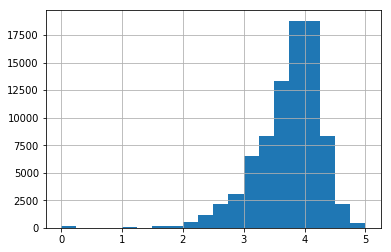

In [8]:
predicted = rec.predict(test_sf)
pd.Series(predicted).hist(bins=20)

In [9]:
import numpy as np
result_df = test_sf.to_dataframe()
result_df['err'] = pd.Series(predicted - test_sf['rating'])

In [10]:
result_df.head()

,uid,bid,rating,tstamp,err
0,mTDwQ4I2hAHz2i5AC1ab3w,wxf6JIS3U1U7d_GMwppq8Q,2,2008-02-04 00:00:00,0.875000
1,UwnXA4ox3K9RMGaRwqgaBw,lqx--hrRwe0oK6WnFYNXlg,5,2012-01-27 00:00:00,-1.150943
2,UwnXA4ox3K9RMGaRwqgaBw,_ZyJLAlkmqefU0WXQ2o6jQ,2,2012-07-22 00:00:00,1.761111
3,sxULQivO3NiCIDmWfZDSnA,QY8CBhPwv6dE4onjhj6MDg,5,2014-05-01 00:00:00,-0.588785
4,J3baStGXE2xRXYcgABj00A,BVRWDjbj9g712L5INfhKog,4,2014-01-22 00:00:00,-0.369863


In [11]:
result_df.groupby('uid').apply(lambda gp: np.sqrt(np.power(gp['err'], 2).mean())).mean()

0.9910860282146261

In [16]:
result_df.groupby('uid').apply(lambda gp: np.sqrt(np.power(gp['err'], 2).mean())).std() / \
    np.sqrt(len(result_df['uid'].value_counts()))

0.0030637268070029685

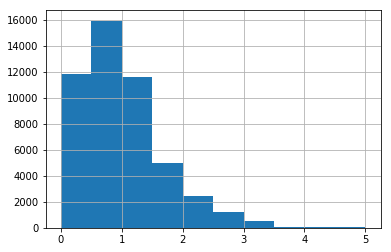

In [14]:
result_df.groupby('uid').apply(lambda gp: np.sqrt(np.power(gp['err'], 2).mean())).hist()

In [15]:
import scipy as sp
merged = pd.merge(df, result_df, left_on=['uid', 'bid'], right_on=['uid', 'bid'])
means = merged.groupby('uid').mean()
sp.stats.spearmanr(means['err_x'], means['err_y'])

SpearmanrResult(correlation=0.68031983241595662, pvalue=0.0)

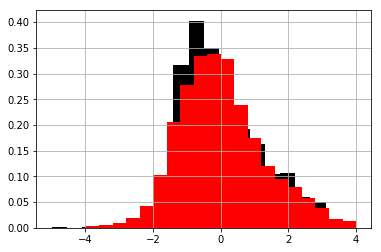

In [13]:
pd.Series(predicted - test_sf['rating']).hist(bins=20, normed=True, color='k',stacked=True)
df = pd.read_csv('../performance/nv_errors_2d.tsv', header=None, sep='\t', names=['uid', 'bid', 'err', 'abs_err'])
df['err'].hist(bins=20, normed=True,color='red',stacked=True)

In [7]:
import numpy as np
df.groupby('uid').apply(lambda gp: np.sqrt(np.power(gp['err'], 2).mean())).mean()

1.0970812582719398

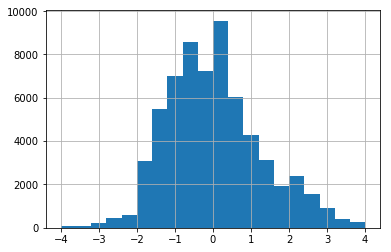

In [6]:
df = pd.read_csv('../performance/nv_errors_1d.tsv', header=None, sep='\t', names=['uid', 'bid', 'err', 'abs_err'])
df['err'].hist(bins=20)

In [53]:
plot_df = pd.DataFrame({
        'itemitem': pd.Series(predicted - test_sf['rating']),
        'w2v': df['err']
    })

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f540c4c7d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f540c11eb50>]], dtype=object)

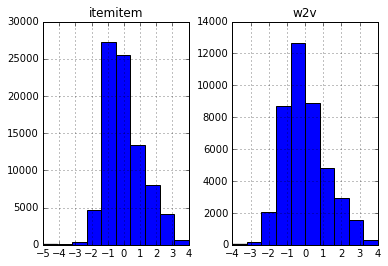

In [54]:
plot_df.